In [2]:
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

from scipy import stats

from IPython.display import display, HTML
display(HTML("<style>.container {width:85%;}</style>"))

# Checking for normality of residuals

| OLS Model Assumption                                                                                                                                                              | Implication of Violation                                                                                                       | Graphical Test                 | Test                   |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|-------------------------------|------------------------|
| Normality of error terms: The error terms should follow a normal distribution with mean of 0<br>OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.<br>If you need to obtain p-values for the coefficient estimates and the overall test of significance, check this assumption! | "Incorrect standard errors;<br>OLS model nolonger BLUE;<br>Sometimes errors are not normal because the linearity assumption is not holding." | Histogram, Q-Q plot            | Shapiro-Wilk test, Anderson-Darling test         |


## Data

In [3]:
selct_columns = ['lwage', 'exper', 'expersq', 'educ',  'age', 'kidslt6', 'kidsge6']
df = (
    pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta')
    .filter(selct_columns)
    .dropna()
    .assign(educgr = lambda X: pd.cut(X["educ"], bins = [5,11,13, 18], labels=('Diploma','Degree','Masters'), ordered=True))
)

## Model

In [5]:
olsModel_02 = smf.ols(formula = 'lwage ~ exper + expersq + educ + age + kidslt6 + kidsge6', data=df).fit()
print(olsModel_02.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     13.19
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.06e-13
Time:                        11:09:48   Log-Likelihood:                -431.24
No. Observations:                 428   AIC:                             876.5
Df Residuals:                     421   BIC:                             904.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4209      0.317     -1.328      0.1

## Checking/Testing for normality of residuals
### Checking graphically

In [6]:
from pynometrics.pynometrics import mplot

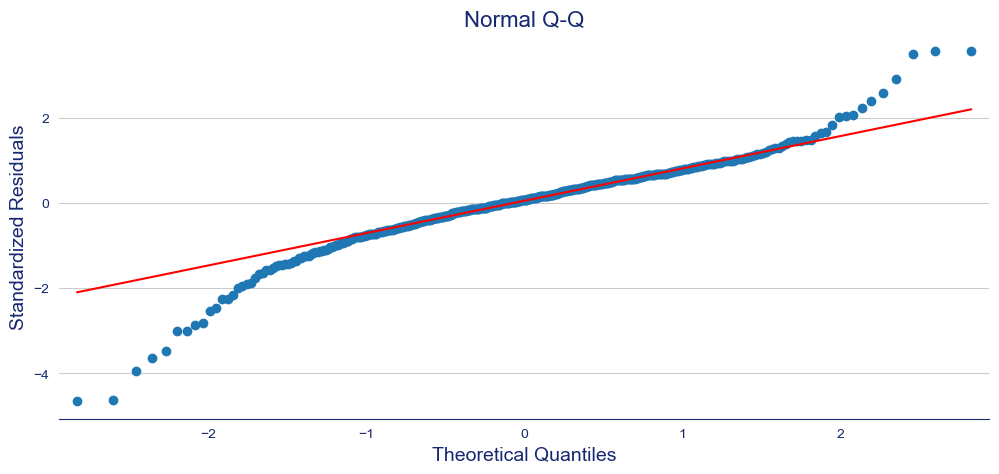

In [8]:
olsModel_02 = smf.ols(formula = 'lwage ~ exper + expersq + educ + age + kidslt6 + kidsge6', data=df).fit()
mplot_init = mplot(olsModel_02)
mplot_init.plot(2)

### Statistical test

#### Shapiro-Wilk Test	
| Test                         | Description                                                                                               |
|------------------------------|-----------------------------------------------------------------------------------------------------------|
| <b>Shapiro-Wilk Test</b>     | It assesses whether a sample of data comes from a normal distribution                                     |
|                              | The null hypothesis is that the data is normally distributed.                                             |

In [27]:
residuals = olsModel_02.resid

testResults = stats.shapiro(residuals)
pd.DataFrame(pd.Series({"statistic":testResults.statistic, "p-value":testResults.pvalue})).T

,statistic,p-value
0,0.93269,5.674581e-13


| p-value | Interpretation                                                                              |
|---------|---------------------------------------------------------------------------------------------|
|         | Reject H0 (data is normally distributed) if the p-value is less than the significance level |


#### Anderson-Darling Test
| Test                         | Description                                                                                               |
|------------------------------|-----------------------------------------------------------------------------------------------------------|
| <b>Anderson-Darling Test</b> | It's similar to the Shapiro-Wilk test but may be more sensitive, especially for larger sample sizes.      |


In [35]:
residuals = olsModel_02.resid

testResults = stats.anderson(residuals, dist="norm")
pd.DataFrame(pd.Series({"test-statistic":testResults.statistic, "critical-value":testResults.critical_values[2]})).T

,test-statistic,critical-value
0,6.329291,0.78


| Interpretation                                                                                     |
|----------------------------------------------------------------------------------------------------|
| Reject H0 (data is normally distributed) if the test statistics is greater than the critical value |